In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import adam
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/win_loss_variables.csv')
print(data)

       Unnamed: 0      gold     tower      kill  blue_result  red_result
0               0  0.000114  0.000073  0.000098            0           1
1               1  0.000057  0.000037  0.000056            0           1
2               2  0.000097  0.000061  0.000119            0           1
3               3  0.000168  0.000134  0.000133            1           0
4               4  0.000093  0.000122  0.000105            1           0
...           ...       ...       ...       ...          ...         ...
10805       10805  0.000077  0.000037  0.000035            0           1
10806       10806  0.000087  0.000122  0.000091            1           0
10807       10807  0.000092  0.000097  0.000160            1           0
10808       10808  0.000089  0.000122  0.000098            1           0
10809       10809  0.000069  0.000122  0.000133            1           0

[10810 rows x 6 columns]


In [5]:
data = data.loc[:,['gold','tower','kill','blue_result','red_result']]

In [6]:
data

,gold,tower,kill,blue_result,red_result
0,0.000114,0.000073,0.000098,0,1
1,0.000057,0.000037,0.000056,0,1
2,0.000097,0.000061,0.000119,0,1
3,0.000168,0.000134,0.000133,1,0
4,0.000093,0.000122,0.000105,1,0
...,...,...,...,...,...
10805,0.000077,0.000037,0.000035,0,1
10806,0.000087,0.000122,0.000091,1,0
10807,0.000092,0.000097,0.000160,1,0
10808,0.000089,0.000122,0.000098,1,0


In [7]:
X = data.loc[:,['gold','tower','kill']]
y = data.loc[:,['blue_result','red_result']]

In [8]:
#stratified shuffle spit

from sklearn.model_selection import StratifiedShuffleSplit
seed = 10
shufflesplit = StratifiedShuffleSplit(n_splits=100,random_state=seed,test_size=0.3)
print(shufflesplit)

for train_index ,test_index in shufflesplit.split(X,y):
    train_x = X.loc[train_index]
    test_x = X.loc[test_index]
    train_y = y.loc[train_index]
    test_y = y.loc[test_index]


StratifiedShuffleSplit(n_splits=100, random_state=10, test_size=0.3,
            train_size=None)


In [9]:
#build model
model = Sequential()
model.add(Dense(128, input_shape=(3,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))

In [10]:
from keras.callbacks import ModelCheckpoint
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/'+'{epoch:02d}-{val_loss:.4f}.hdf5',monitor = 'val_loss',verbose=1,save_best_only=True)


In [15]:
train_x

,gold,tower,kill
567,0.000082,0.000097,0.000139
9722,0.000112,0.000134,0.000139
10731,0.000100,0.000122,0.000077
4756,0.000105,0.000134,0.000133
5787,0.000070,0.000012,0.000035
...,...,...,...
6117,0.000074,0.000049,0.000056
3058,0.000128,0.000146,0.000153
9668,0.000087,0.000146,0.000084
4825,0.000087,0.000122,0.000098


In [16]:
history = model.fit(train_x,train_y,epochs=1000,batch_size=128,verbose=1,validation_data=[test_x,test_y],callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7567 samples, validate on 3243 samples
Epoch 1/1000
7567/7567 [==============================] - 0s 50us/step - loss: 0.6907 - accuracy: 0.5391 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00001: val_loss improved from inf to 0.68980, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/01-0.6898.hdf5
Epoch 2/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6900 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00002: val_loss did not improve from 0.68980
Epoch 3/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6905 - accuracy: 0.5409 - val_loss: 0.6899 - val_accuracy: 0.5409

Epoch 00003: val_loss did not improve from 0.68980
Epoch 4/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6899 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00004: val_loss

7567/7567 [==============================] - 0s 22us/step - loss: 0.6900 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00035: val_loss did not improve from 0.68977
Epoch 36/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6897 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00036: val_loss did not improve from 0.68977
Epoch 37/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6900 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00037: val_loss did not improve from 0.68977
Epoch 38/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6900 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00038: val_loss did not improve from 0.68977
Epoch 39/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6902 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00039: val_loss did not improve from 0.68977
Epoch 40/1000


7567/7567 [==============================] - 0s 22us/step - loss: 0.6897 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00074: val_loss did not improve from 0.68976
Epoch 75/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6900 - accuracy: 0.5409 - val_loss: 0.6897 - val_accuracy: 0.5409

Epoch 00075: val_loss improved from 0.68976 to 0.68975, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/75-0.6897.hdf5
Epoch 76/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6899 - accuracy: 0.5409 - val_loss: 0.6897 - val_accuracy: 0.5409

Epoch 00076: val_loss improved from 0.68975 to 0.68975, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/76-0.6897.hdf5
Epoch 77/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6898 - accuracy: 0.5409 - val_loss: 0.6898 - val_accuracy: 0.5409

Epoch 00077: val_loss did not improve from 0.68975
Epoch 78/1000
7567/7567 

7567/7567 [==============================] - 0s 22us/step - loss: 0.6898 - accuracy: 0.5409 - val_loss: 0.6896 - val_accuracy: 0.5409

Epoch 00108: val_loss improved from 0.68963 to 0.68961, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/108-0.6896.hdf5
Epoch 109/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6896 - accuracy: 0.5409 - val_loss: 0.6896 - val_accuracy: 0.5409

Epoch 00109: val_loss did not improve from 0.68961
Epoch 110/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6898 - accuracy: 0.5409 - val_loss: 0.6896 - val_accuracy: 0.5409

Epoch 00110: val_loss improved from 0.68961 to 0.68958, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/110-0.6896.hdf5
Epoch 111/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6896 - accuracy: 0.5409 - val_loss: 0.6896 - val_accuracy: 0.5409

Epoch 00111: val_loss improved from 0.68958 to 0.68956, saving model t

Epoch 138/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6887 - accuracy: 0.5409 - val_loss: 0.6883 - val_accuracy: 0.5409

Epoch 00138: val_loss improved from 0.68845 to 0.68827, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/138-0.6883.hdf5
Epoch 139/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6882 - accuracy: 0.5409 - val_loss: 0.6882 - val_accuracy: 0.5409

Epoch 00139: val_loss improved from 0.68827 to 0.68822, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/139-0.6882.hdf5
Epoch 140/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6887 - accuracy: 0.5409 - val_loss: 0.6883 - val_accuracy: 0.5409

Epoch 00140: val_loss did not improve from 0.68822
Epoch 141/1000
7567/7567 [==============================] - 0s 21us/step - loss: 0.6882 - accuracy: 0.5409 - val_loss: 0.6879 - val_accuracy: 0.5409

Epoch 00141: val_loss improved from 0.68822 to 0.68795,

7567/7567 [==============================] - 0s 22us/step - loss: 0.6729 - accuracy: 0.5409 - val_loss: 0.6679 - val_accuracy: 0.5409

Epoch 00168: val_loss improved from 0.67025 to 0.66794, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/168-0.6679.hdf5
Epoch 169/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6703 - accuracy: 0.5417 - val_loss: 0.6662 - val_accuracy: 0.5409

Epoch 00169: val_loss improved from 0.66794 to 0.66623, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/169-0.6662.hdf5
Epoch 170/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6684 - accuracy: 0.5402 - val_loss: 0.6651 - val_accuracy: 0.5409

Epoch 00170: val_loss improved from 0.66623 to 0.66510, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/170-0.6651.hdf5
Epoch 171/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6677 - accuracy: 0.5409 - val_loss: 0.663

Epoch 200/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6055 - accuracy: 0.6479 - val_loss: 0.5811 - val_accuracy: 0.9192

Epoch 00200: val_loss did not improve from 0.56854
Epoch 201/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6062 - accuracy: 0.6535 - val_loss: 0.5633 - val_accuracy: 0.8686

Epoch 00201: val_loss improved from 0.56854 to 0.56334, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/201-0.5633.hdf5
Epoch 202/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6092 - accuracy: 0.6428 - val_loss: 0.5619 - val_accuracy: 0.6796

Epoch 00202: val_loss improved from 0.56334 to 0.56188, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/202-0.5619.hdf5
Epoch 203/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.6055 - accuracy: 0.6505 - val_loss: 0.5528 - val_accuracy: 0.7882

Epoch 00203: val_loss improved from 0.56188 to 0.55278,

7567/7567 [==============================] - 0s 22us/step - loss: 0.5776 - accuracy: 0.6786 - val_loss: 0.4978 - val_accuracy: 0.9294

Epoch 00236: val_loss did not improve from 0.48788
Epoch 237/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5740 - accuracy: 0.6811 - val_loss: 0.5435 - val_accuracy: 0.8998

Epoch 00237: val_loss did not improve from 0.48788
Epoch 238/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5839 - accuracy: 0.6711 - val_loss: 0.5299 - val_accuracy: 0.9174

Epoch 00238: val_loss did not improve from 0.48788
Epoch 239/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5748 - accuracy: 0.6828 - val_loss: 0.5307 - val_accuracy: 0.9084

Epoch 00239: val_loss did not improve from 0.48788
Epoch 240/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5733 - accuracy: 0.6831 - val_loss: 0.5876 - val_accuracy: 0.7906

Epoch 00240: val_loss did not improve from 0.48788
Epoch 241/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5805 - accuracy: 0.6733 - val_loss: 0.4872 - val_accuracy: 0.9254

Epoch 00274: val_loss did not improve from 0.44089
Epoch 275/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5628 - accuracy: 0.6893 - val_loss: 0.4473 - val_accuracy: 0.9322

Epoch 00275: val_loss did not improve from 0.44089
Epoch 276/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5651 - accuracy: 0.6846 - val_loss: 0.4502 - val_accuracy: 0.9322

Epoch 00276: val_loss did not improve from 0.44089
Epoch 277/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5652 - accuracy: 0.6909 - val_loss: 0.4461 - val_accuracy: 0.9328

Epoch 00277: val_loss did not improve from 0.44089
Epoch 278/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5615 - accuracy: 0.6892 - val_loss: 0.4610 - val_accuracy: 0.9359

Epoch 00278: val_loss did not improve from 0.44089
Epoch 279/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5641 - accuracy: 0.6892 - val_loss: 0.4576 - val_accuracy: 0.9365

Epoch 00313: val_loss did not improve from 0.41706
Epoch 314/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5672 - accuracy: 0.6876 - val_loss: 0.4215 - val_accuracy: 0.9325

Epoch 00314: val_loss did not improve from 0.41706
Epoch 315/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5718 - accuracy: 0.6810 - val_loss: 0.5331 - val_accuracy: 0.8585

Epoch 00315: val_loss did not improve from 0.41706
Epoch 316/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5655 - accuracy: 0.6857 - val_loss: 0.4385 - val_accuracy: 0.9380

Epoch 00316: val_loss did not improve from 0.41706
Epoch 317/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5653 - accuracy: 0.6926 - val_loss: 0.4671 - val_accuracy: 0.9269

Epoch 00317: val_loss did not improve from 0.41706
Epoch 318/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5547 - accuracy: 0.6906 - val_loss: 0.4653 - val_accuracy: 0.9238

Epoch 00353: val_loss did not improve from 0.41433
Epoch 354/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5690 - accuracy: 0.6896 - val_loss: 0.4431 - val_accuracy: 0.9389

Epoch 00354: val_loss did not improve from 0.41433
Epoch 355/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5640 - accuracy: 0.6909 - val_loss: 0.4240 - val_accuracy: 0.9414

Epoch 00355: val_loss did not improve from 0.41433
Epoch 356/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5572 - accuracy: 0.6900 - val_loss: 0.4434 - val_accuracy: 0.9374

Epoch 00356: val_loss did not improve from 0.41433
Epoch 357/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5573 - accuracy: 0.6926 - val_loss: 0.5426 - val_accuracy: 0.8205

Epoch 00357: val_loss did not improve from 0.41433
Epoch 358/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5608 - accuracy: 0.6893 - val_loss: 0.5215 - val_accuracy: 0.8532

Epoch 00392: val_loss did not improve from 0.39786
Epoch 393/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5498 - accuracy: 0.6957 - val_loss: 0.4221 - val_accuracy: 0.9423

Epoch 00393: val_loss did not improve from 0.39786
Epoch 394/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5558 - accuracy: 0.6959 - val_loss: 0.4409 - val_accuracy: 0.9368

Epoch 00394: val_loss did not improve from 0.39786
Epoch 395/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5579 - accuracy: 0.6930 - val_loss: 0.4058 - val_accuracy: 0.9417

Epoch 00395: val_loss did not improve from 0.39786
Epoch 396/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5584 - accuracy: 0.6934 - val_loss: 0.4709 - val_accuracy: 0.9127

Epoch 00396: val_loss did not improve from 0.39786
Epoch 397/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5566 - accuracy: 0.6966 - val_loss: 0.5096 - val_accuracy: 0.8646

Epoch 00432: val_loss did not improve from 0.39196
Epoch 433/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5601 - accuracy: 0.6892 - val_loss: 0.3921 - val_accuracy: 0.9420

Epoch 00433: val_loss did not improve from 0.39196
Epoch 434/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5545 - accuracy: 0.6937 - val_loss: 0.5426 - val_accuracy: 0.8119

Epoch 00434: val_loss did not improve from 0.39196
Epoch 435/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5513 - accuracy: 0.6922 - val_loss: 0.4251 - val_accuracy: 0.9405

Epoch 00435: val_loss did not improve from 0.39196
Epoch 436/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5540 - accuracy: 0.6923 - val_loss: 0.5441 - val_accuracy: 0.8094

Epoch 00436: val_loss did not improve from 0.39196
Epoch 437/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5544 - accuracy: 0.6997 - val_loss: 0.4264 - val_accuracy: 0.9411

Epoch 00472: val_loss did not improve from 0.38951
Epoch 473/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5488 - accuracy: 0.6994 - val_loss: 0.4115 - val_accuracy: 0.9473

Epoch 00473: val_loss did not improve from 0.38951
Epoch 474/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5636 - accuracy: 0.6859 - val_loss: 0.4651 - val_accuracy: 0.9174

Epoch 00474: val_loss did not improve from 0.38951
Epoch 475/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5463 - accuracy: 0.7036 - val_loss: 0.4550 - val_accuracy: 0.9223

Epoch 00475: val_loss did not improve from 0.38951
Epoch 476/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5575 - accuracy: 0.6905 - val_loss: 0.5038 - val_accuracy: 0.8659

Epoch 00476: val_loss did not improve from 0.38951
Epoch 477/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5434 - accuracy: 0.7057 - val_loss: 0.4933 - val_accuracy: 0.8733

Epoch 00512: val_loss did not improve from 0.37918
Epoch 513/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5450 - accuracy: 0.7005 - val_loss: 0.3757 - val_accuracy: 0.9454

Epoch 00513: val_loss improved from 0.37918 to 0.37573, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/513-0.3757.hdf5
Epoch 514/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5575 - accuracy: 0.6901 - val_loss: 0.4090 - val_accuracy: 0.9482

Epoch 00514: val_loss did not improve from 0.37573
Epoch 515/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5521 - accuracy: 0.6957 - val_loss: 0.5701 - val_accuracy: 0.7656

Epoch 00515: val_loss did not improve from 0.37573
Epoch 516/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5526 - accuracy: 0.6945 - val_lo

7567/7567 [==============================] - 0s 22us/step - loss: 0.5522 - accuracy: 0.6974 - val_loss: 0.5344 - val_accuracy: 0.8230

Epoch 00552: val_loss did not improve from 0.37573
Epoch 553/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5489 - accuracy: 0.6959 - val_loss: 0.3909 - val_accuracy: 0.9507

Epoch 00553: val_loss did not improve from 0.37573
Epoch 554/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5469 - accuracy: 0.6991 - val_loss: 0.3667 - val_accuracy: 0.9396

Epoch 00554: val_loss improved from 0.37573 to 0.36674, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/554-0.3667.hdf5
Epoch 555/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5629 - accuracy: 0.6836 - val_loss: 0.5081 - val_accuracy: 0.8566

Epoch 00555: val_loss did not improve from 0.36674
Epoch 556/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5363 - accuracy: 0.7127 - val_lo

7567/7567 [==============================] - 0s 22us/step - loss: 0.5525 - accuracy: 0.6938 - val_loss: 0.4356 - val_accuracy: 0.9328

Epoch 00592: val_loss did not improve from 0.36674
Epoch 593/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5489 - accuracy: 0.6974 - val_loss: 0.3800 - val_accuracy: 0.9516

Epoch 00593: val_loss did not improve from 0.36674
Epoch 594/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5413 - accuracy: 0.7046 - val_loss: 0.4768 - val_accuracy: 0.8881

Epoch 00594: val_loss did not improve from 0.36674
Epoch 595/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5463 - accuracy: 0.6962 - val_loss: 0.4684 - val_accuracy: 0.8936

Epoch 00595: val_loss did not improve from 0.36674
Epoch 596/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5419 - accuracy: 0.7036 - val_loss: 0.5434 - val_accuracy: 0.8002

Epoch 00596: val_loss did not improve from 0.36674
Epoch 597/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5523 - accuracy: 0.6909 - val_loss: 0.4031 - val_accuracy: 0.9476

Epoch 00633: val_loss did not improve from 0.36674
Epoch 634/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5427 - accuracy: 0.6987 - val_loss: 0.4913 - val_accuracy: 0.8757

Epoch 00634: val_loss did not improve from 0.36674
Epoch 635/1000
7567/7567 [==============================] - 0s 21us/step - loss: 0.5504 - accuracy: 0.6933 - val_loss: 0.4519 - val_accuracy: 0.9078

Epoch 00635: val_loss did not improve from 0.36674
Epoch 636/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5395 - accuracy: 0.7065 - val_loss: 0.4237 - val_accuracy: 0.9439

Epoch 00636: val_loss did not improve from 0.36674
Epoch 637/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5411 - accuracy: 0.7036 - val_loss: 0.3674 - val_accuracy: 0.9544

Epoch 00637: val_loss did not improve from 0.36674
Epoch 638/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5364 - accuracy: 0.7086 - val_loss: 0.3850 - val_accuracy: 0.9534

Epoch 00673: val_loss did not improve from 0.36471
Epoch 674/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5505 - accuracy: 0.6941 - val_loss: 0.5019 - val_accuracy: 0.8563

Epoch 00674: val_loss did not improve from 0.36471
Epoch 675/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5448 - accuracy: 0.7027 - val_loss: 0.5852 - val_accuracy: 0.7302

Epoch 00675: val_loss did not improve from 0.36471
Epoch 676/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5505 - accuracy: 0.6939 - val_loss: 0.5004 - val_accuracy: 0.8600

Epoch 00676: val_loss did not improve from 0.36471
Epoch 677/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5355 - accuracy: 0.7074 - val_loss: 0.5651 - val_accuracy: 0.7663

Epoch 00677: val_loss did not improve from 0.36471
Epoch 678/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5536 - accuracy: 0.6901 - val_loss: 0.4734 - val_accuracy: 0.8856

Epoch 00714: val_loss did not improve from 0.36388
Epoch 715/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5437 - accuracy: 0.7020 - val_loss: 0.4856 - val_accuracy: 0.8733

Epoch 00715: val_loss did not improve from 0.36388
Epoch 716/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5397 - accuracy: 0.7017 - val_loss: 0.5559 - val_accuracy: 0.7767

Epoch 00716: val_loss did not improve from 0.36388
Epoch 717/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5474 - accuracy: 0.6983 - val_loss: 0.4976 - val_accuracy: 0.8566

Epoch 00717: val_loss did not improve from 0.36388
Epoch 718/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5292 - accuracy: 0.7094 - val_loss: 0.3754 - val_accuracy: 0.9541

Epoch 00718: val_loss did not improve from 0.36388
Epoch 719/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5436 - accuracy: 0.7028 - val_loss: 0.4048 - val_accuracy: 0.9451

Epoch 00754: val_loss did not improve from 0.35167
Epoch 755/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5466 - accuracy: 0.6933 - val_loss: 0.3844 - val_accuracy: 0.9522

Epoch 00755: val_loss did not improve from 0.35167
Epoch 756/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5404 - accuracy: 0.7009 - val_loss: 0.4497 - val_accuracy: 0.9115

Epoch 00756: val_loss did not improve from 0.35167
Epoch 757/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5340 - accuracy: 0.7058 - val_loss: 0.4662 - val_accuracy: 0.8936

Epoch 00757: val_loss did not improve from 0.35167
Epoch 758/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5384 - accuracy: 0.7028 - val_loss: 0.3842 - val_accuracy: 0.9525

Epoch 00758: val_loss did not improve from 0.35167
Epoch 759/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5422 - accuracy: 0.7029 - val_loss: 0.4594 - val_accuracy: 0.9081

Epoch 00794: val_loss did not improve from 0.34362
Epoch 795/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5374 - accuracy: 0.7029 - val_loss: 0.3904 - val_accuracy: 0.9528

Epoch 00795: val_loss did not improve from 0.34362
Epoch 796/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5355 - accuracy: 0.7074 - val_loss: 0.4216 - val_accuracy: 0.9383

Epoch 00796: val_loss did not improve from 0.34362
Epoch 797/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5417 - accuracy: 0.6986 - val_loss: 0.4013 - val_accuracy: 0.9485

Epoch 00797: val_loss did not improve from 0.34362
Epoch 798/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5367 - accuracy: 0.7044 - val_loss: 0.5662 - val_accuracy: 0.7570

Epoch 00798: val_loss did not improve from 0.34362
Epoch 799/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5478 - accuracy: 0.6943 - val_loss: 0.3865 - val_accuracy: 0.9534

Epoch 00835: val_loss did not improve from 0.34362
Epoch 836/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5397 - accuracy: 0.7003 - val_loss: 0.4250 - val_accuracy: 0.9269

Epoch 00836: val_loss did not improve from 0.34362
Epoch 837/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5400 - accuracy: 0.7013 - val_loss: 0.4643 - val_accuracy: 0.8933

Epoch 00837: val_loss did not improve from 0.34362
Epoch 838/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5352 - accuracy: 0.7065 - val_loss: 0.4249 - val_accuracy: 0.9300

Epoch 00838: val_loss did not improve from 0.34362
Epoch 839/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5401 - accuracy: 0.7066 - val_loss: 0.4721 - val_accuracy: 0.8794

Epoch 00839: val_loss did not improve from 0.34362
Epoch 840/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5430 - accuracy: 0.6962 - val_loss: 0.3481 - val_accuracy: 0.9618

Epoch 00876: val_loss did not improve from 0.34362
Epoch 877/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5303 - accuracy: 0.7089 - val_loss: 0.3999 - val_accuracy: 0.9436

Epoch 00877: val_loss did not improve from 0.34362
Epoch 878/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5369 - accuracy: 0.7064 - val_loss: 0.4272 - val_accuracy: 0.9278

Epoch 00878: val_loss did not improve from 0.34362
Epoch 879/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5447 - accuracy: 0.6957 - val_loss: 0.4817 - val_accuracy: 0.8791

Epoch 00879: val_loss did not improve from 0.34362
Epoch 880/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5405 - accuracy: 0.7012 - val_loss: 0.3654 - val_accuracy: 0.9559

Epoch 00880: val_loss did not improve from 0.34362
Epoch 881/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5367 - accuracy: 0.7041 - val_loss: 0.4232 - val_accuracy: 0.9248

Epoch 00916: val_loss did not improve from 0.33947
Epoch 917/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5329 - accuracy: 0.7031 - val_loss: 0.3451 - val_accuracy: 0.9581

Epoch 00917: val_loss did not improve from 0.33947
Epoch 918/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5397 - accuracy: 0.7038 - val_loss: 0.4642 - val_accuracy: 0.8896

Epoch 00918: val_loss did not improve from 0.33947
Epoch 919/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5336 - accuracy: 0.7073 - val_loss: 0.4781 - val_accuracy: 0.8686

Epoch 00919: val_loss did not improve from 0.33947
Epoch 920/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5443 - accuracy: 0.6971 - val_loss: 0.4697 - val_accuracy: 0.8862

Epoch 00920: val_loss did not improve from 0.33947
Epoch 921/

7567/7567 [==============================] - 0s 22us/step - loss: 0.5351 - accuracy: 0.7045 - val_loss: 0.4296 - val_accuracy: 0.9208

Epoch 00956: val_loss did not improve from 0.33208
Epoch 957/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5303 - accuracy: 0.7090 - val_loss: 0.3305 - val_accuracy: 0.9522

Epoch 00957: val_loss improved from 0.33208 to 0.33047, saving model to /home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/957-0.3305.hdf5
Epoch 958/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5400 - accuracy: 0.7005 - val_loss: 0.4359 - val_accuracy: 0.9161

Epoch 00958: val_loss did not improve from 0.33047
Epoch 959/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5500 - accuracy: 0.6888 - val_loss: 0.3977 - val_accuracy: 0.9463

Epoch 00959: val_loss did not improve from 0.33047
Epoch 960/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5303 - accuracy: 0.7102 - val_lo

7567/7567 [==============================] - 0s 22us/step - loss: 0.5309 - accuracy: 0.7058 - val_loss: 0.4362 - val_accuracy: 0.9164

Epoch 00996: val_loss did not improve from 0.33047
Epoch 997/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5381 - accuracy: 0.6990 - val_loss: 0.4976 - val_accuracy: 0.8486

Epoch 00997: val_loss did not improve from 0.33047
Epoch 998/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5335 - accuracy: 0.7062 - val_loss: 0.3652 - val_accuracy: 0.9578

Epoch 00998: val_loss did not improve from 0.33047
Epoch 999/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5349 - accuracy: 0.7032 - val_loss: 0.3720 - val_accuracy: 0.9581

Epoch 00999: val_loss did not improve from 0.33047
Epoch 1000/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5475 - accuracy: 0.6934 - val_loss: 0.4008 - val_accuracy: 0.9528

Epoch 01000: val_loss did not improve from 0.33047


In [ ]:
'''
Epoch 957/1000
7567/7567 [==============================] - 0s 22us/step - loss: 0.5303 - accuracy: 0.7090 - val_loss: 0.3305 - val_accuracy: 0.9522
'''

In [17]:
history_dict = history.history
import matplotlib.pyplot as plt

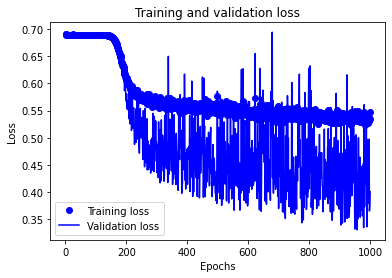

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


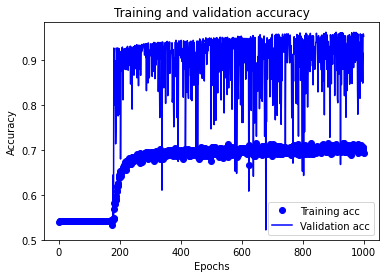

In [19]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [20]:
test_x

,gold,tower,kill
1902,0.000077,0.000097,0.000112
7657,0.000095,0.000146,0.000139
3132,0.000145,0.000134,0.000112
2633,0.000137,0.000146,0.000084
4908,0.000081,0.000134,0.000119
...,...,...,...
8412,0.000052,0.000037,0.000014
10475,0.000106,0.000097,0.000091
6583,0.000067,0.000110,0.000139
1003,0.000137,0.000134,0.000181


In [21]:
from keras.models import load_model
model_best = load_model('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/models/957-0.3305.hdf5')

In [22]:
y_predict = model_best.predict(test_x)

In [23]:
y_predict

array([[0.3852346 , 0.12534273],
       [0.8856931 , 0.03640825],
       [0.6878282 , 0.06854272],
       ...,
       [0.6308419 , 0.07766026],
       [0.85531   , 0.04178939],
       [0.14184092, 0.22412091]], dtype=float32)